### Imports

In [1]:
import sys
import numpy as np
import pandas as pd
from fingerprints.get_fp import output, input

import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from plotnine import *
import seaborn as sns

In [2]:
odorants = pd.read_csv('data/odorants.csv')
labels = pd.read_csv('data/labels.csv')
labels_ = labels.set_index("CID").iloc[:, 1:]
solubility = pd.read_csv('data/solubility.csv')

labels_kmeans = pd.read_csv('data/labels_kmeans.csv')
labels_manual = pd.read_csv('data/labels_manual.csv')
labels_manual_expert = pd.read_csv('data/labels_manual_expert.csv')
labels_hrc = pd.read_csv('data/labels_hrc.csv')

# Counts per cluster

In [3]:
def plot_cluster_counts(*dataframes, exclude_label='CID'):
    """
    Plot the number of samples in each cluster for any number of dataframes.
    
    Parameters:
    - *dataframes: A variable number of pandas DataFrames with one-hot encodings for clusters.
    - exclude_label: A label to exclude from the counts, default is 'CID'.
    """
    # Initializing an empty dictionary to hold the counts for each dataframe
    counts_dict = {}
    
    # Iterating over each dataframe and calculating the cluster counts
    for i, df in enumerate(dataframes):
        counts = df.sum().sort_values(ascending=False)
        if exclude_label in counts:
            counts = counts.drop(exclude_label)
        counts_dict[f'df{i+1}_counts'] = counts.values
    
    # Creating a DataFrame from the dictionary
    combined_df = pd.DataFrame(counts_dict)

    print(combined_df)
    
    # Optional: Calculating a total count across all datasets for ordering
    combined_df['Total'] = combined_df.sum(axis=1)
    combined_df = combined_df.sort_values(by='Total', ascending=False).drop(columns=['Total'])
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(combined_df.shape[0])  # Cluster positions
    width = 0.8 / len(dataframes)  # Width of the bars, adjusted for the number of dataframes
    
    # Generate bars for each dataset
    for i, col in enumerate(combined_df.columns):
        ax.bar(x + i*width, combined_df[col], width, label=col)
    
    # Formatting the plot
    ax.set_ylabel('Counts')
    ax.set_title('Counts by cluster and dataset')
    ax.set_xticks(x + width / 2)
    ax.set_xticklabels([f'{i+1}' for i in x])  # Adjusting labels if necessary
    ax.legend()
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


   df1_counts  df2_counts
0        1772        1736
1        1377        1287
2        1220        1189
3        1168        1170
4        1111        1136
5        1018        1101
6         896        1050
7         821         635
8         551         247


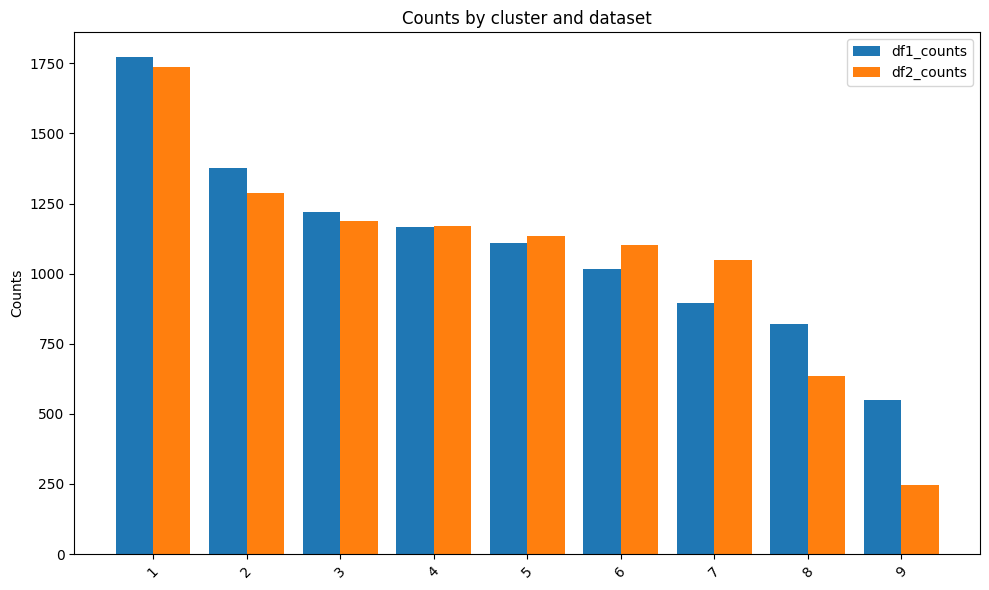

In [5]:
plot_cluster_counts(labels_kmeans, labels_manual)

# Co-occurrence

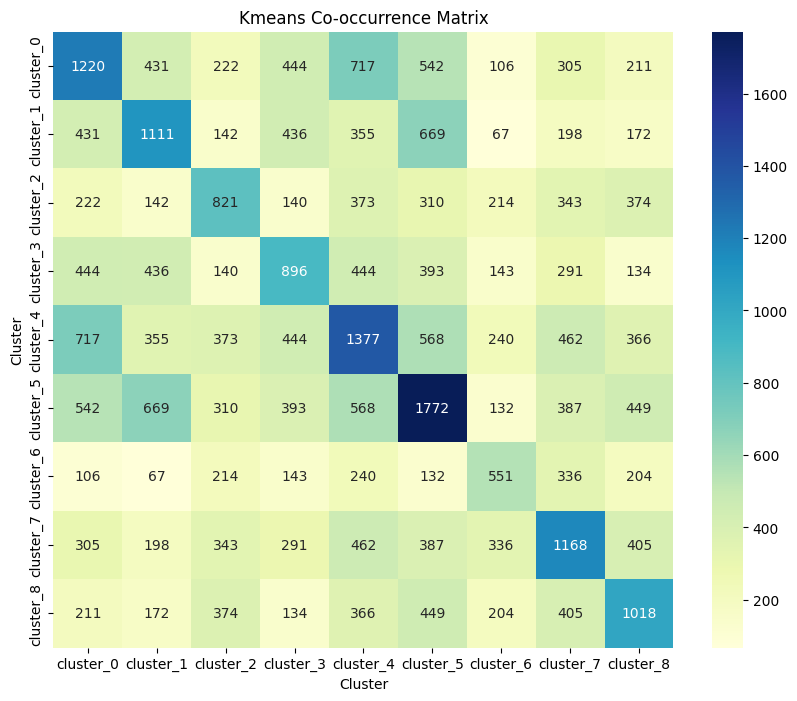

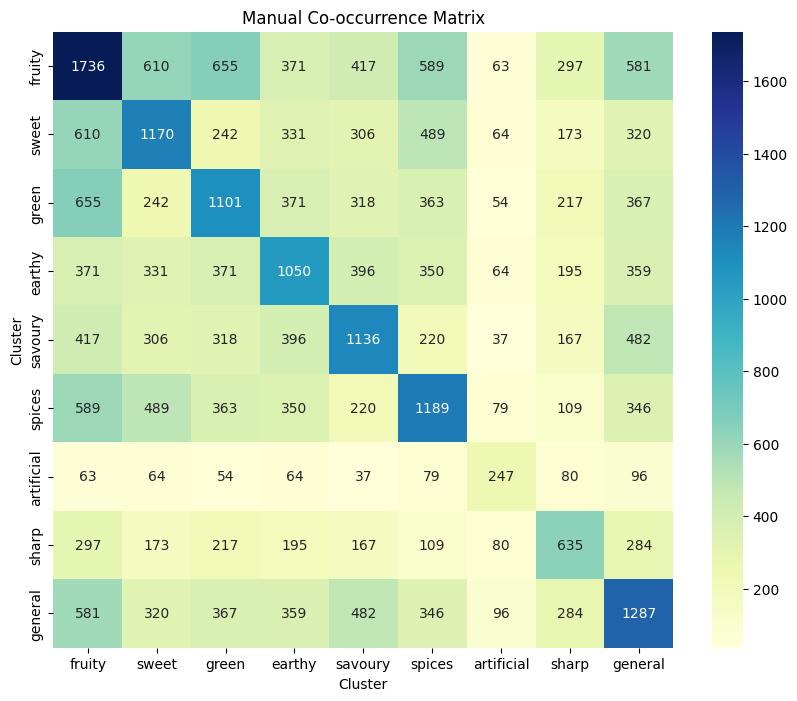

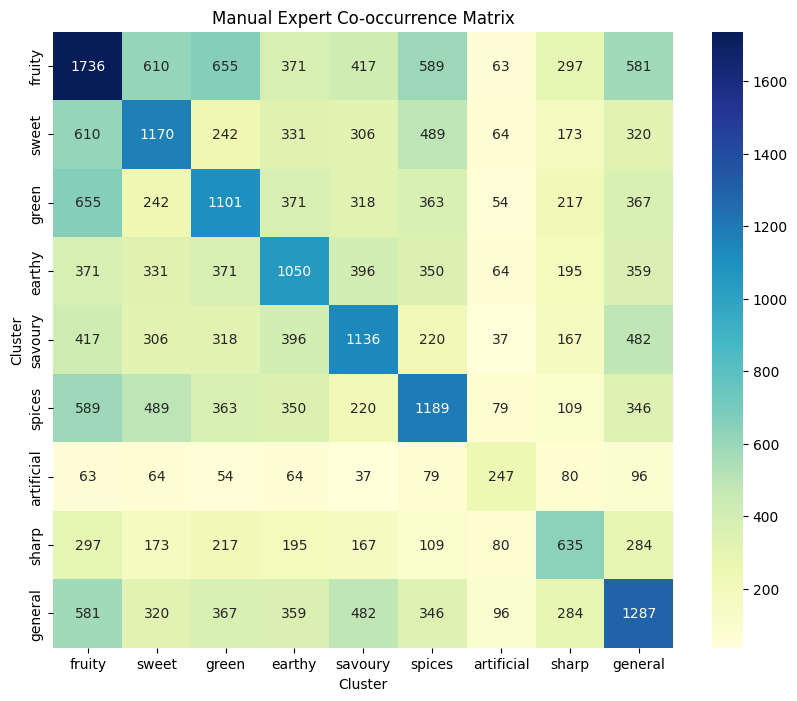

In [6]:
# Correlation matrix (kmeans)
labels_kmeans_no_CID = labels_kmeans.iloc[:, 1:]
kmeans_cor = labels_kmeans_no_CID.T.dot(labels_kmeans_no_CID)

# Correlation matrix (manual)
labels_manual_no_CID = labels_manual.iloc[:, 1:]
manual_cor = labels_manual_no_CID.T.dot(labels_manual_no_CID)

# Correlation matrix (manual expert)
labels_manual_expert_no_CID = labels_manual_expert.iloc[:, 1:]
manual_expert_cor = labels_manual_expert_no_CID.T.dot(labels_manual_expert_no_CID)

# Heatmap (kmeans)
plt.figure(figsize=(10, 8))
sns.heatmap(kmeans_cor, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Kmeans Co-occurrence Matrix")
plt.xlabel("Cluster")
plt.ylabel("Cluster")
plt.show()

# Heatmap (manual)
plt.figure(figsize=(10, 8))
sns.heatmap(manual_cor, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Manual Co-occurrence Matrix")
plt.xlabel("Cluster")
plt.ylabel("Cluster")
plt.show()

# Heatmap (manual expert)
plt.figure(figsize=(10, 8))
sns.heatmap(manual_cor, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Manual Expert Co-occurrence Matrix")
plt.xlabel("Cluster")
plt.ylabel("Cluster")
plt.show()
